# Building an Anime Recommender System

In [1]:
import datasets, utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, vstack

In [2]:
animes = pd.read_csv('data/AnimeList.csv')
anime_dict = {a.anime_id: a.title for i,a in animes.iterrows()}

# If an English title exists. Replace the original title.
for i,a in animes.iterrows():
    if pd.isna(a.title_english):
        anime_dict[a.anime_id] = a.title_english
        
anime_ids = animes.sort_values(by="anime_id").anime_id.unique()

In [3]:
size = 3e6
reader = pd.read_csv('data/UserAnimeList.csv', chunksize = size)

chunk_list = []
userlist = []

# Each chunk is in dataframe format
for chunk in reader:  
    chunk = chunk[['username', 'anime_id', 'my_score']]
    chunk = chunk[chunk.my_score != 0]
    
    # Transform Dataframe to (N=#users x K=#animes) matrix, with scores as values
    chunk = chunk.pivot(index="username", columns="anime_id", values="my_score")
    
    # Add dimensions so that we can easily vstack
    chunk = chunk.reindex(columns = anime_ids)
    
    # Extract userlist
    userlist = userlist + chunk.index.tolist()
    
    chunk = csr_matrix(chunk.fillna(0))  # Convert to SciPy sparse matrix
    
    chunk_list.append(chunk)

In [4]:
X = vstack(chunk_list, format="csr")

In [5]:
from sklearn.decomposition import NMF
model = NMF(n_components=7, init='nndsvda', shuffle=True)
W = model.fit_transform(X)
H = model.components_

In [51]:
PYTHON_ID = ul.index('Manuel')

prediction = pd.Series(np.dot(W[PYTHON_ID],H), index=anime_ids)
_, watched = X[PYTHON_ID].nonzero()
watched = anime_ids[watched]
prediction = prediction.drop(list(watched))  # watched has python index notation!

for i in prediction.sort_values(ascending=False).head(200).index:
    print(anime_dict[i])

Cowboy Bebop
Death Note
Fullmetal Alchemist: Brotherhood
Toki wo Kakeru Shoujo
Howl no Ugoku Shiro
Samurai Champloo
Byousoku 5 Centimeter
Ghost in the Shell
Bakemonogatari
Akira
Tonari no Totoro
Evangelion: 1.0 You Are (Not) Alone
Higurashi no Naku Koro ni
Summer Wars
Mushishi
Hotaru no Haka
Paprika
Evangelion: 2.0 You Can (Not) Advance
Clannad
Serial Experiments Lain
Clannad: After Story
Trigun
Kaze no Tani no Nausicaä
Fate/Zero
Toradora!
K-On!
Angel Beats!
Higashi no Eden
Ergo Proxy
Cowboy Bebop: Tengoku no Tobira
Perfect Blue
Lucky☆Star
Great Teacher Onizuka
Soul Eater
Shingeki no Kyojin
Tenkuu no Shiro Laputa
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.
Fate/Zero 2nd Season
Ghost in the Shell: Stand Alone Complex
Kara no Kyoukai 2: Satsujin Kousatsu (Zen)
Hellsing Ultimate
Higurashi no Naku Koro ni Kai
Monster
Kara no Kyoukai 5: Mujun Rasen
Majo no Takkyuubin
Kara no Kyoukai 3: Tsuukaku Zanryuu
Psycho-Pass
Suzumiya Haruhi no Yuuutsu (2009)
Sayonara Zetsubou Sensei
Drago

In [44]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=7, n_iter=7)
X_trans = svd.fit_transform(X)

In [45]:
X_embedded = TSNE(n_components=2).fit_transform(X_trans)

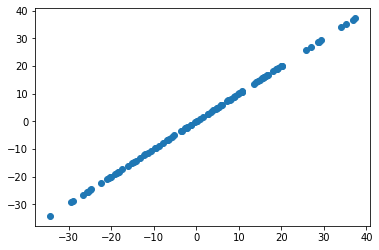

In [48]:
plt.scatter(X_embedded[:100,1], X_embedded[:100,1])

In [54]:
reader